In [1]:
import pandas as pd
import datetime
from dateutil import parser
from statistics import mean
import numpy as np
from statistics import variance as var
import quandl

In [2]:
auth_default = "VhLmhL-NbYjbUmBSyDA6"
quandl.ApiConfig.api_key = auth_default

In [3]:
vix = quandl.get("CBOE/VIX")
vxv = quandl.get("CBOE/VXV")

In [4]:
def merge_df_date(a,b):
    return pd.DataFrame.merge(a,b,how='outer',left_index=True, right_index=True)

In [5]:
v1= vix.drop(columns=['VIX Open', 'VIX High', 'VIX Low'])
v2 = vxv.drop(columns=['HIGH', 'LOW', 'OPEN'])
comb = pd.DataFrame.merge(v1,v2,how='inner',left_index=True, right_index=True)

In [6]:
from statistics import median

In [7]:
ivts = comb['VIX Close'] / comb['CLOSE']
med5 = [0.0,0.0,0.0,0.0,0.0]
for i in range(5, len(ivts)):
    med5.append(median(ivts[i-5:i]))
ret5 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
for i in range(10, len(ivts)):
    ret5.append(median(ivts[i-5:i]))
comb['IVTS'] = ivts
comb['med5'] = med5
comb['ret5'] = ret5
vix_table = comb

In [8]:
rec_table = pd.read_csv("Recency_Rankings.csv")
log_df = pd.read_csv("log_df.csv")

In [9]:
rec_table

Unnamed: 0        AA      AABA       AAL      AAOI  \
0     2001-01-02T00:00:00.000Z       NaN  0.304945       NaN       NaN   
1     2001-01-03T00:00:00.000Z       NaN  0.304945       NaN       NaN   
2     2001-01-04T00:00:00.000Z       NaN  0.313187       NaN       NaN   
3     2001-01-05T00:00:00.000Z       NaN  0.310440       NaN       NaN   
4     2001-01-08T00:00:00.000Z       NaN  0.307692       NaN       NaN   
5     2001-01-09T00:00:00.000Z       NaN  0.304945       NaN       NaN   
6     2001-01-10T00:00:00.000Z       NaN  0.447802       NaN       NaN   
7     2001-01-11T00:00:00.000Z       NaN  0.445055       NaN       NaN   
8     2001-01-12T00:00:00.000Z       NaN  0.442308       NaN       NaN   
9     2001-01-16T00:00:00.000Z       NaN  0.439560       NaN       NaN   
10    2001-01-17T00:00:00.000Z       NaN  0.436813       NaN       NaN   
11    2001-01-18T00:00:00.000Z       NaN  0.434066       NaN       NaN   
12    2001-01-19T00:00:00.000Z       NaN  0.431319       NaN       NaN   
13    2001-01-22T00:00:00.000Z       NaN  0.428571       NaN       NaN   
14    2001-01-23T00:00:00.000Z       NaN  0.425824       NaN       NaN   
15    2001-01-24T00:00:00.000Z       NaN  0.423077       NaN       NaN   
16    2001-01-25T00:00:00.000Z       NaN  0.420330       NaN       NaN   
17    2001-01-26T00:00:00.000Z       NaN  0.417582       NaN       NaN   
18    2001-01-29T00:00:00.000Z       NaN  0.414835       NaN       NaN   
19    2001-01-30T00:00:00.000Z       NaN  0.412088       NaN       NaN   
20    2001-01-31T00:00:00.000Z       NaN  0.409341       NaN       NaN   
21    2001-02-01T00:00:00.000Z       NaN  0.406593       NaN       NaN   
22    2001-02-02T00:00:00.000Z       NaN  0.403846       NaN       NaN   
23    2001-02-05T00:00:00.000Z       NaN  0.401099       NaN       NaN   
24    2001-02-06T00:00:00.000Z       NaN  0.398352       NaN       NaN   
25    2001-02-07T00:00:00.000Z       NaN  0.395604       NaN       NaN   
26    2001-02-08T00:00:00.000Z       NaN  0.392857       NaN       NaN   
27    2001-02-09T00:00:00.000Z       NaN  0.390110       NaN       NaN   
28    2001-02-12T00:00:00.000Z       NaN  0.387363       NaN       NaN   
29    2001-02-13T00:00:00.000Z       NaN  0.384615       NaN       NaN   
...                        ...       ...       ...       ...       ...   
4279  2018-01-05T00:00:00.000Z  0.989011  0.994505  0.664835  0.697802   
4280  2018-01-08T00:00:00.000Z  0.986264  0.994505  0.662088  0.695055   
4281  2018-01-09T00:00:00.000Z  0.983516  0.991758  0.659341  0.692308   
4282  2018-01-10T00:00:00.000Z  0.980769  0.994505  0.656593  0.689560   
4283  2018-01-11T00:00:00.000Z  0.994505  0.991758  0.653846  0.686813   
4284  2018-01-12T00:00:00.000Z  0.994505  0.989011  0.994505  0.684066   
4285  2018-01-16T00:00:00.000Z  0.991758  0.986264  0.994505  0.681319   
4286  2018-01-17T00:00:00.000Z  0.989011  0.983516  0.991758  0.678571   
4287  2018-01-18T00:00:00.000Z  0.994505  0.980769  0.989011  0.675824   
4288  2018-01-19T00:00:00.000Z  0.991758  0.978022  0.986264  0.673077   
4289  2018-01-22T00:00:00.000Z  0.989011  0.975275  0.983516  0.670330   
4290  2018-01-23T00:00:00.000Z  0.986264  0.972527  0.980769  0.667582   
4291  2018-01-24T00:00:00.000Z  0.983516  0.969780  0.978022  0.664835   
4292  2018-01-25T00:00:00.000Z  0.980769  0.994505  0.975275  0.662088   
4293  2018-01-26T00:00:00.000Z  0.978022  0.994505  0.972527  0.659341   
4294  2018-01-29T00:00:00.000Z  0.975275  0.994505  0.969780  0.656593   
4295  2018-01-30T00:00:00.000Z  0.972527  0.991758  0.967033  0.653846   
4296  2018-01-31T00:00:00.000Z  0.969780  0.989011  0.964286  0.651099   
4297  2018-02-01T00:00:00.000Z  0.967033  0.986264  0.961538  0.648352   
4298  2018-02-02T00:00:00.000Z  0.964286  0.983516  0.958791  0.645604   
4299  2018-02-05T00:00:00.000Z  0.961538  0.980769  0.956044  0.642857   
4300  2018-02-06T00:00:00.000Z  0.958791  0.978022  0.953297  0.640110   
4301  2018-02-07T00:00:0

In [10]:
def top_decile_ind(data, ind, fullr=False):
    dd = data.iloc[ind][1:]
    sd = dd.sort_values(ascending=False)
    sz = len(sd) // 10
    if fullr:
        out = sd
    else:
        out = list(sd.index[:sz])
    return out

In [11]:
dd = top_decile_ind(rec_table,10)
dd

['STZ',
 'NBR',
 'SKX',
 'PRGO',
 'RL',
 'ATVI',
 'PAA',
 'NKE',
 'UNP',
 'CCJ',
 'MAT',
 'MAR',
 'VFC',
 'LUV',
 'NLY',
 'USB',
 'SHW',
 'TOL',
 'KEY',
 'CAT',
 'KSU',
 'DHI',
 'KSS',
 'AEO',
 'GPC',
 'CBI',
 'AET',
 'CALM',
 'BAX',
 'MO',
 'GD',
 'SWK',
 'JNJ',
 'HFC',
 'KR',
 'MCK',
 'SYY',
 'SWN',
 'BMY',
 'ADM',
 'TAP',
 'MBI']

In [12]:
dic = {}
for i in rec_table.index:
    dt = rec_table['Unnamed: 0'][i]
    dtt = parser.parse(dt).date()
    nm = top_decile_ind(rec_table,i)
    dic[dtt] = nm

In [13]:
def backtest_w_filter(price_data, signal_data, vix_table,window,step=1):
    ind = []
    res = []
    for i in range(window,len(signal_data),step):
        dtt = signal_data['Unnamed: 0'][i-window]
        dt = parser.parse(dtt).date()
        tdec = dic[dt]
        out = []
        # filter has data?
        if dt >= parser.parse(str(vix_table.index[0])).date():
            for x in tdec:
                td = price_data[x][i-window]
                fd = price_data[x][i]
                #filter
                if vix_table['ret5'][dt] <= .95:
                    out.append(fd - td)
                else:
                    out.append(0)
            ind.append(dt)
            res.append(out)
    return ind, res

In [14]:
def evolve(y,kk,ov=1):
    nx=[1.0]
    k = kk/ov
    for xset in y:
        sc = [x*k for x in xset]
        rr = nx[-1]*(1+mean(sc))
        nx.append(rr)
    return nx[1:]

In [15]:
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt
def my_plot(x,y):
    plt.figure(figsize=(8,6), dpi=80)
    plot(x, y)
    return plt.show()

In [16]:
# note modified to reference backtest with filter
def qb(window, step,k=1):
    ind, res = backtest_w_filter(log_df, rec_table, vix_table,window, step)
    ov = 1
    if window > step:
        ov = window // step + 1
    ev = evolve(res,k, ov)
    return my_plot(ind, ev)

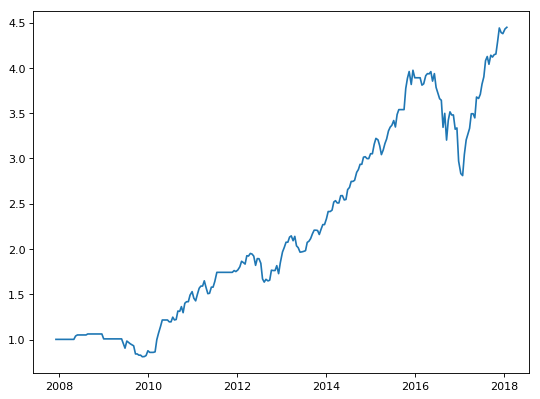

In [17]:
qb(10,10)

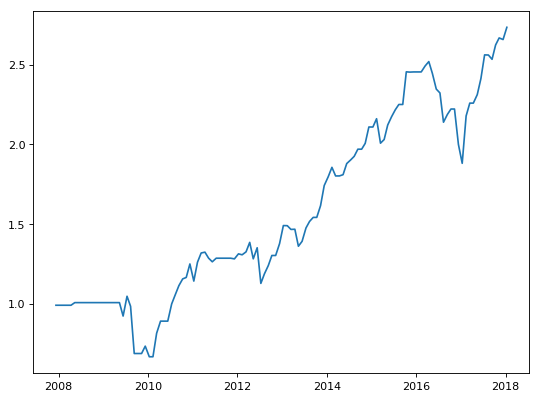

In [18]:
qb(21,21)

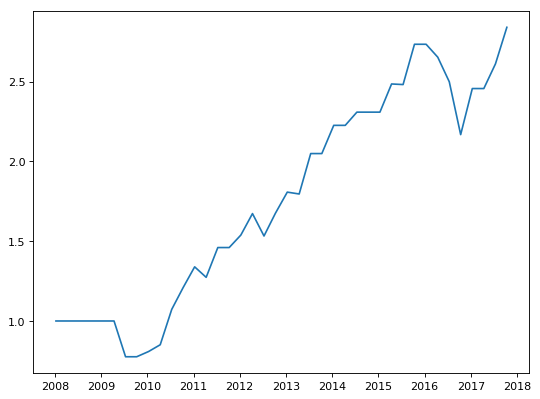

In [19]:
qb(63,63)

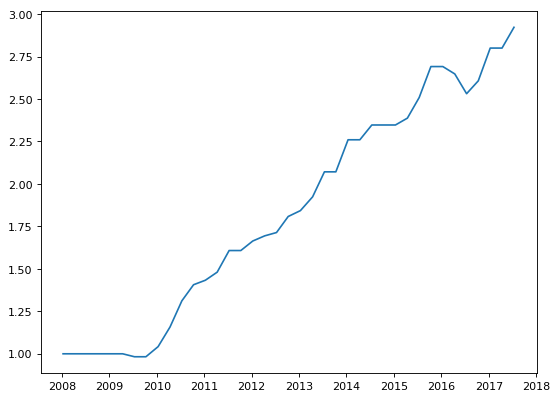

In [20]:
qb(126,63)

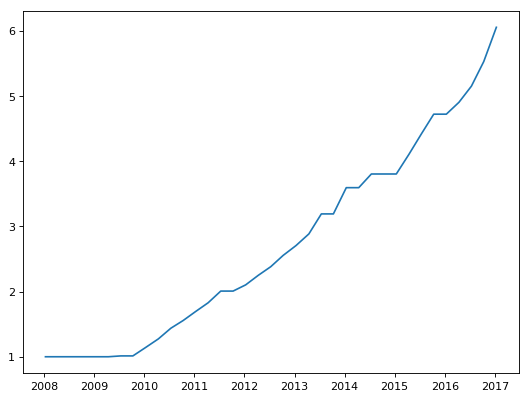

In [21]:
qb(252,63)

In [22]:
def raw_moment(vec, r):
    return 1 / len(vec) * sum(list(map(lambda i: i**r, vec)))

In [23]:
def kelly(retvec, int=6):
    moms = []
    for i in range(int):
        moms.append(raw_moment(retvec, i+1))
    p = []
    for i in range(len(moms)):
        p.append((-1)**i * moms[i])
    r = np.polynomial.polynomial.polyroots(p)
    rr = r.real[abs(r.imag)<1e-5]
    return min(rr)

In [42]:
x,yy = backtest_w_filter(log_df, rec_table,vix_table ,10,10)

In [43]:
#kelly...uses mean returns from each window
kt = kelly(list(map(mean,yy)))
kt

5.7707917261641315

In [44]:
r0 = evolve(yy,1,1)
rkt = evolve(yy,kt,1)
rhalf = evolve(yy, kt/2,1)

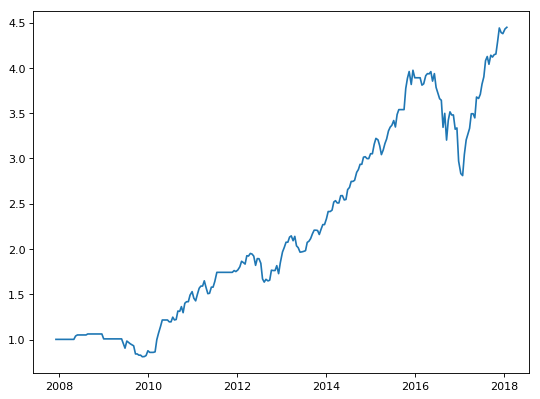

In [45]:
# no leverage
my_plot(x, r0)

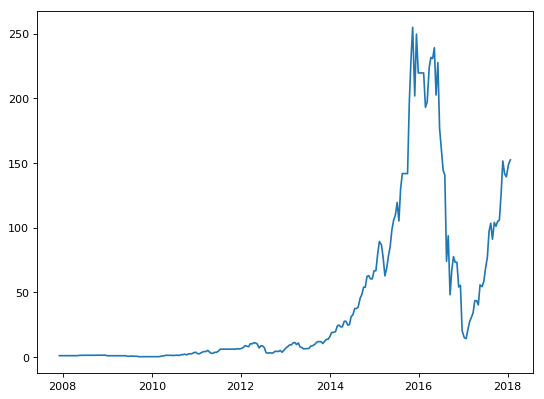

In [46]:
my_plot(x, rkt)

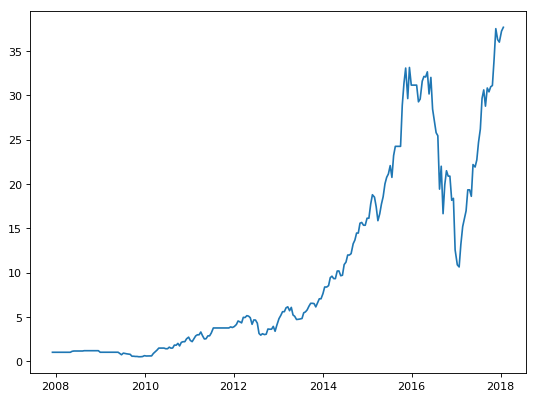

In [47]:
my_plot(x,rhalf)

In [48]:
# Sharpe ratio is great
mean(list(map(mean,yy)))/var(list(map(mean,yy)))

6.596613598443589

In [49]:
# rolling sharpe
y = list(map(mean,yy))
def sharpe(yy):
    return mean(yy)/var(yy)

In [53]:
sh=[]
xsh = []
ke = []
for x in range(63,len(y)):
    sh.append(sharpe(y[x-63:x]))
    xsh.append(x-63)
    ke.append(kelly(y[x-63:x]))

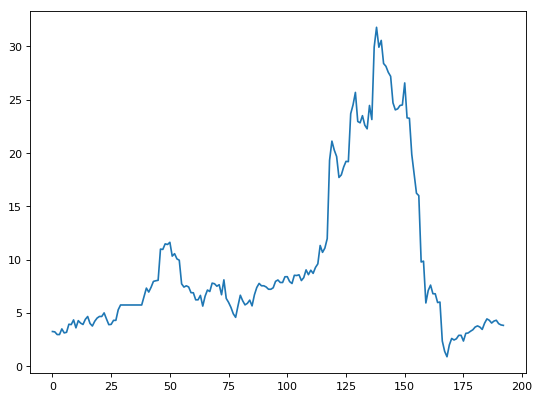

In [54]:
# Rolling 63 day Sharpe for 2 week trade
my_plot(xsh,sh)

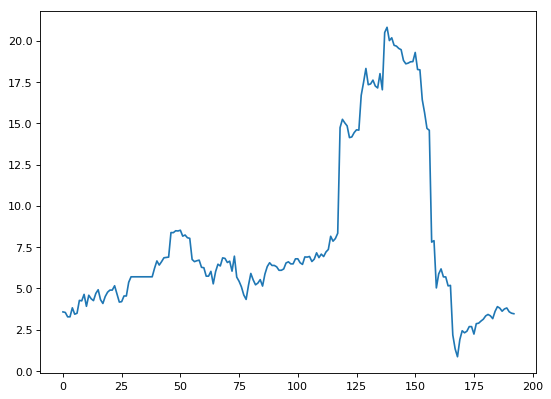

In [55]:
# Rolling 63 day kelly ratio for 2 week trade
my_plot(xsh, ke)